# Proyek Analisis Data: Nama dataset
- Nama: Muhammad Shodiq Fathoni
- Email: shodiqfathoni3@gmail.com
- Id Dicoding: shodiq29

## Menentukan Pertanyaan Bisnis

- dibulan apa kenaikan peminjaman sepeda paling tinggi dan rendah ?
- di musim apa orang paling banyak meminjam sepeda dan dimusim apa paling sedikit pemijaman sepeda ?

## Menyaipkan semua library yang dibuthkan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
day_df = pd.read_csv("C:\\Users\\USER\\Documents\\proyek_analisis_data\\day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour_df = pd.read_csv("C:\\Users\\USER\\Documents\\proyek_analisis_data\\hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [5]:
day_df.info()
day_df.isna().sum()
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [6]:
hour_df.info()
hour_df.isna().sum()
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [16]:
datetime_columns = ["dteday"]
     
for column in datetime_columns:
    day_df[column] = pd.to_datetime(day_df[column])


season_mapping = {1: 'musim semi', 2: 'musim panas', 3: 'musim gugur', 4: 'musim dingin'}
day_df['season'].replace(season_mapping, inplace=True)

holiday_mapping = {1: 'hari libur', 0: 'bukan hari libur'}
day_df['holiday'].replace(holiday_mapping, inplace=True)

weekday_mapping = {0: 'minggu', 1: 'senin', 2: 'selasa', 3: 'rabu', 4: 'kamis', 5: 'jumat', 6: 'sabtu'}
day_df['weekday'].replace(weekday_mapping, inplace=True)

workingday_mapping = {0: 'hari libur', 1: 'hari kerja'}
day_df['workingday'].replace(workingday_mapping, inplace=True)

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    object        
 6   weekday     731 non-null    object        
 7   workingday  731 non-null    object        
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [18]:
datetime_columns = ["dteday"]
     
for column in datetime_columns:
    hour_df[column] = pd.to_datetime(hour_df[column])

season_mapping = {1: 'musim semi', 2: 'musim panas', 3: 'musim gugur', 4: 'musim dingin'}
hour_df['season'].replace(season_mapping, inplace=True)

holiday_mapping = {1: 'hari libur', 0: 'bukan hari libur'}
hour_df['holiday'].replace(holiday_mapping, inplace=True)

weekday_mapping = {0: 'minggu', 1: 'senin', 2: 'selasa', 3: 'rabu', 4: 'kamis', 5: 'jumat', 6: 'sabtu'}
hour_df['weekday'].replace(weekday_mapping, inplace=True)

workingday_mapping = {0: 'hari libur', 1: 'hari kerja'}
hour_df['workingday'].replace(workingday_mapping, inplace=True)

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  object        
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  object        
 7   weekday     17379 non-null  object        
 8   workingday  17379 non-null  object        
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore ...

menghubungkan semua data

In [27]:

all_df = pd.merge(left=day_df, right=hour_df, on='dteday', how='inner')

all_df.head()


,instant_x,dteday,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,musim semi,0,1,bukan hari libur,sabtu,hari libur,2,0.344167,...,sabtu,hari libur,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,musim semi,0,1,bukan hari libur,sabtu,hari libur,2,0.344167,...,sabtu,hari libur,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,musim semi,0,1,bukan hari libur,sabtu,hari libur,2,0.344167,...,sabtu,hari libur,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,musim semi,0,1,bukan hari libur,sabtu,hari libur,2,0.344167,...,sabtu,hari libur,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,musim semi,0,1,bukan hari libur,sabtu,hari libur,2,0.344167,...,sabtu,hari libur,1,0.24,0.2879,0.75,0.0,0,1,1


In [20]:
# Mengelompokkan data berdasarkan bulan dan menghitung jumlah peminjaman sepeda pada setiap bulan
monthly_counts = all_df.groupby(all_df['dteday'].dt.to_period('M')).agg({'cnt_y': 'sum'})

# Mengonversi indeks kembali ke tanggal (dalam format YYYY-MM)
monthly_counts.index = monthly_counts.index.astype(str)

## Visualization & Explanatory Analysis

### Pertanyaan 1: dibulan apa kenaikan peminjaman sepeda paling tinggi dan rendah ?

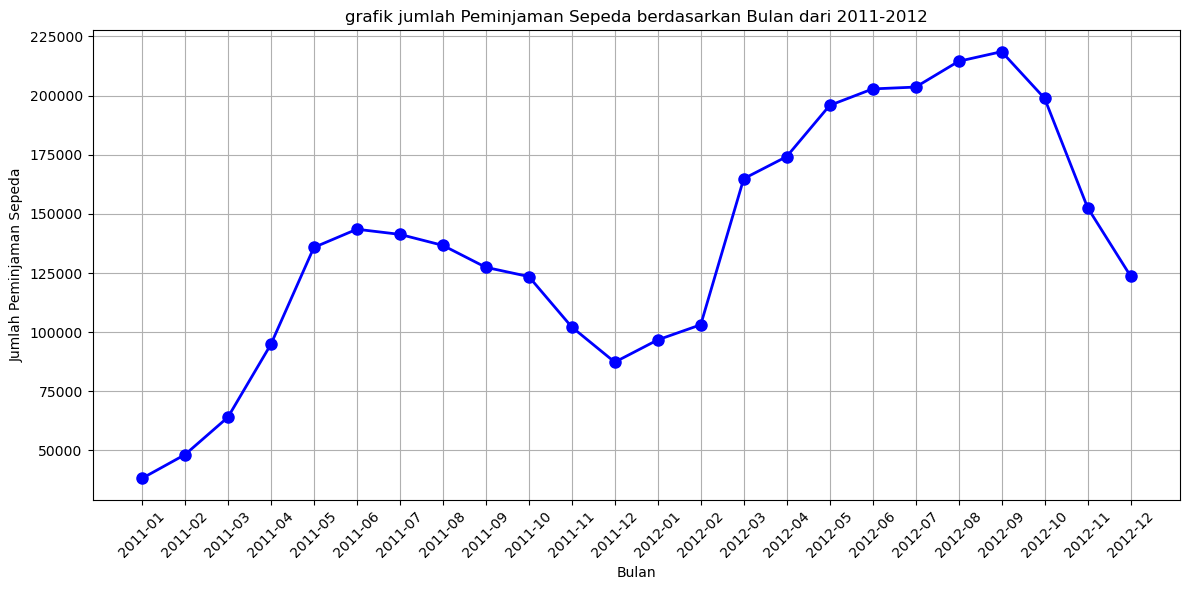

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_counts.index, monthly_counts['cnt_y'], marker='o', color='b', linewidth=2, markersize=8)
plt.xlabel('Bulan')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.title('grafik jumlah Peminjaman Sepeda berdasarkan Bulan dari 2011-2012')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


### Pertanyaan 2: di musim apa orang paling banyak meminjam sepeda dan dimusim apa paling sedikit pemijaman sepeda ?

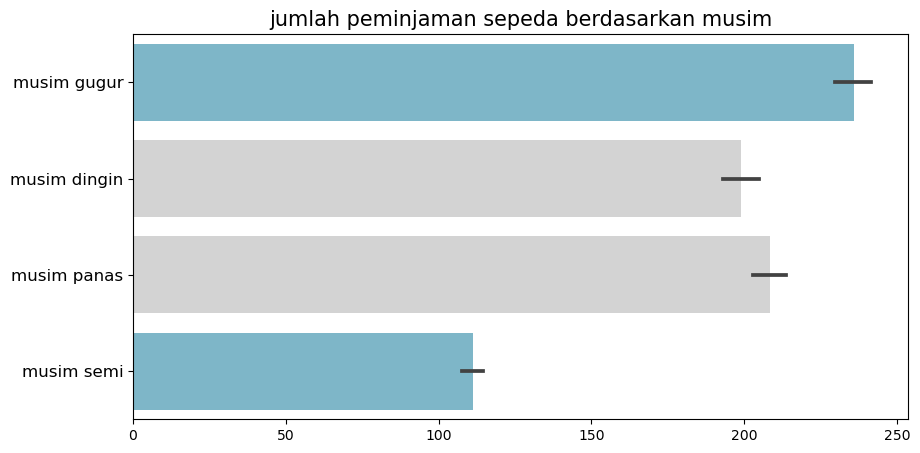

In [22]:
plt.figure(figsize=(10, 5))
colors= ["#72BCD4", "#D3D3D3", "#D3D3D3", "#72BCD4"]

sns.barplot(
    x="cnt_y", 
    y="season_x",
    data=all_df.sort_values(by="cnt_y", ascending=False),
    palette=colors
)
plt.title("jumlah peminjaman sepeda berdasarkan musim", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

## Conclusion

-
    Kenaikan Peminjaman sepeda paling tinggi terjadi pada bulan september 2012
    dan jumlah peminjaman sepeda paling rendah terjadi pada bulan januari 2011
    
- 
    jumlah peminjaman sepeda paling tinggi terjadi pada musim gugur
    dan jumlah peminjaman sepeda paling rendah terjadi pada musim semi

In [23]:
all_df.to_csv("all_pro1.csv", index=False)